# Importing relevant libraries and modules

In [5]:
import zipfile
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np
from IPython.display import display

### Haar cascade classifier

In [6]:
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

### Reading the Zipfile

In [7]:
file_names=[]
files={}
with zipfile.ZipFile('readonly/images.zip') as myzip:
    for i in myzip.infolist():
        file_names.append(i.filename)
        files[i.filename]={'Image':Image.open(myzip.open(i.filename)).convert('RGB')}

### Reading text from Images 

In [8]:
for file_name in files.keys():
    img=files[file_name]['Image'].convert('L').point(lambda x:0 if x<170 else 255)
    files[file_name]['text']=pytesseract.image_to_string(img)

### Identifying faces from Images

In [13]:
for file_name in files.keys():
    cv_image=np.array(files[file_name]['Image'])
    cv_gray=cv.cvtColor(cv_image, cv.COLOR_BGR2GRAY)
    faces_bounding_boxes=face_cascade.detectMultiScale(cv_gray,1.3,4)
    files[file_name]['faces']=[]
    for x,y,w,h in faces_bounding_boxes:
        face=files[file_name]['Image'].crop((x,y,x+w,y+h))
        files[file_name]['faces'].append(face)
        
for file_name in files.keys():
    for face in files[file_name]['faces']:
        face.thumbnail((100,100))        

### Function for searching Word in Images

In [14]:
def search(word):
    for file_name in files.keys():
        if word in files[file_name]['text']:
            print('Results found in file {}'.format(file_name))
            if len(files[file_name]['faces'])!=0:
                if len(files[file_name]['faces'])%5 == 0:
                    h=int(len(files[file_name]['faces'])/5)
                else:
                    h=int(len(files[file_name]['faces'])/5)+ 1
                contact_sheet=Image.new('RGB', (500,100*h))
                x=0
                y=0
                for img in files[file_name]['faces']:
                    contact_sheet.paste(img, (x, y) )
                    if x+100==contact_sheet.width:
                        x=0
                        y=y+100
                    else:
                        x=x+100
                display(contact_sheet)         
            else:
                print("But there were no faces in that file!")

Results found in file a-0.png


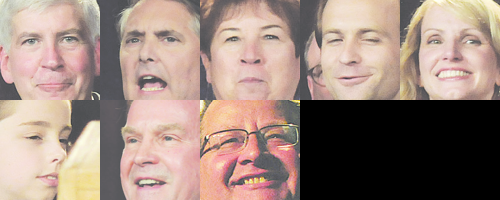

Results found in file a-3.png


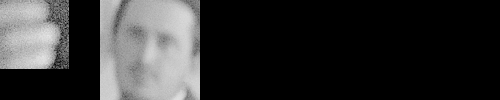

In [15]:
search('Christopher')